In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('C:\Python\winequality-red.csv') # Loading data set

In [116]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [117]:
df.shape  # Check data Column and row 

(1599, 12)

In [118]:
df.isnull().sum()  # Check Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [119]:
df.describe() # 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:title={'center':'Quality VS Fixed Acidity'}, xlabel='quality', ylabel='fixed acidity'>

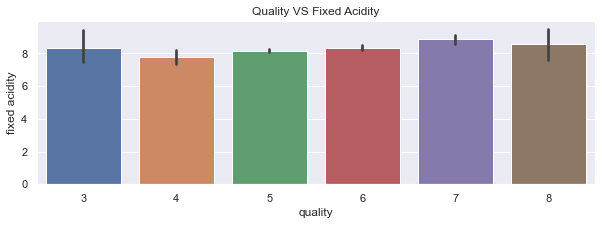

In [129]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Fixed Acidity")
sns.barplot(x='quality', y = 'fixed acidity', data=df)


<AxesSubplot:title={'center':'Quality VS Volatile acidity'}, xlabel='quality', ylabel='volatile acidity'>

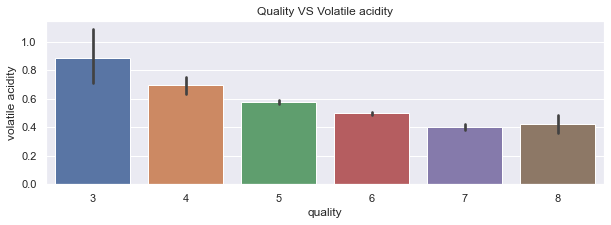

In [132]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Volatile acidity")
sns.barplot(x='quality', y = 'volatile acidity', data=df)

<AxesSubplot:title={'center':'Quality VS Citric acid'}, xlabel='quality', ylabel='citric acid'>

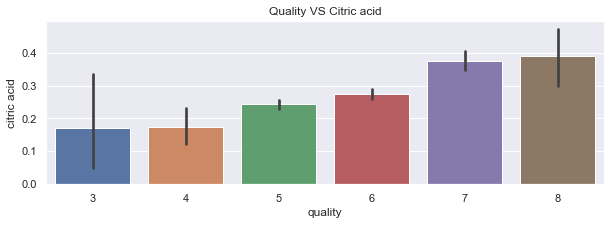

In [133]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Citric acid")
sns.barplot(x='quality', y = 'citric acid', data=df)

<AxesSubplot:title={'center':'Quality VS Residual sugar'}, xlabel='quality', ylabel='residual sugar'>

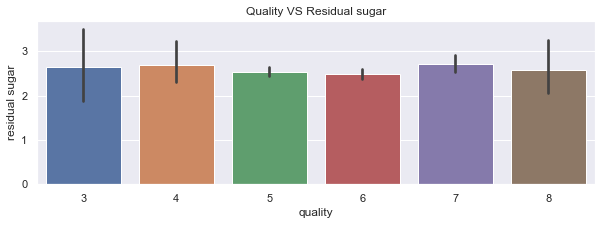

In [134]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Residual sugar")
sns.barplot(x='quality', y = 'residual sugar', data=df)

<AxesSubplot:title={'center':'Quality VS Chlorides'}, xlabel='quality', ylabel='chlorides'>

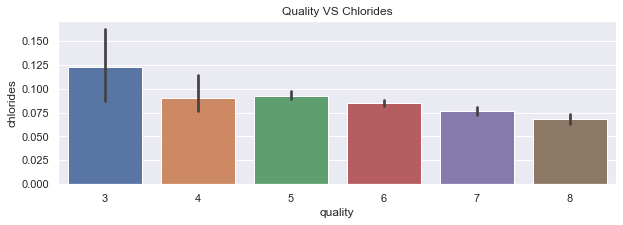

In [135]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Chlorides")
sns.barplot(x='quality', y = 'chlorides', data=df)

<AxesSubplot:title={'center':'Quality VS Free sulfur dioxide'}, xlabel='quality', ylabel='free sulfur dioxide'>

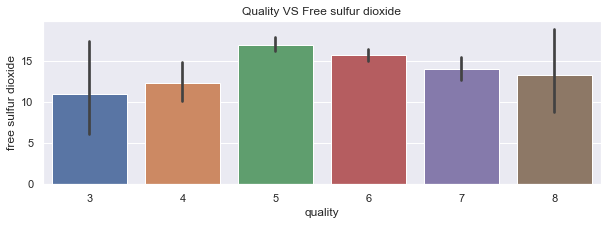

In [136]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Free sulfur dioxide")
sns.barplot(x='quality', y = 'free sulfur dioxide', data=df)

<AxesSubplot:title={'center':'Quality VS Total sulfur dioxide acidity'}, xlabel='quality', ylabel='total sulfur dioxide'>

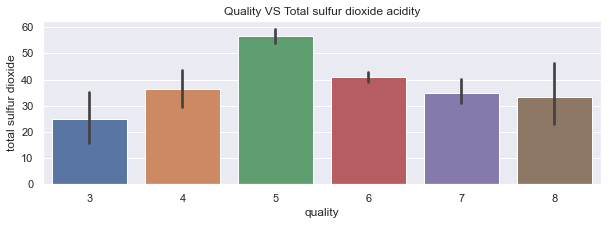

In [137]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Total sulfur dioxide acidity")
sns.barplot(x='quality', y = 'total sulfur dioxide', data=df)

<AxesSubplot:title={'center':'Quality VS Density'}, xlabel='quality', ylabel='density'>

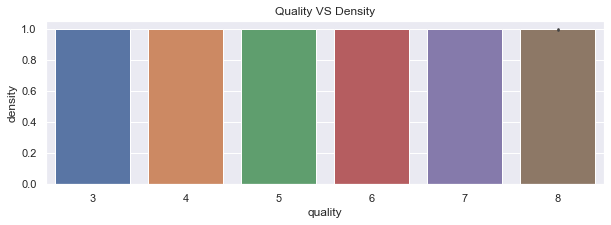

In [138]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Density")
sns.barplot(x='quality', y = 'density', data=df)

<AxesSubplot:title={'center':'Quality VS Sulphates'}, xlabel='quality', ylabel='sulphates'>

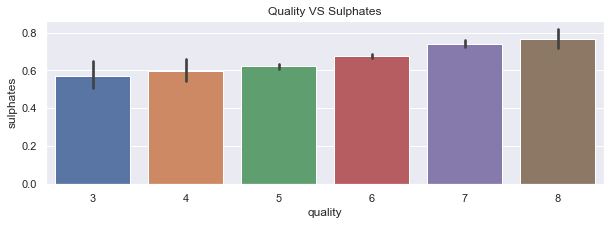

In [139]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Sulphates")
sns.barplot(x='quality', y = 'sulphates', data=df)

<AxesSubplot:title={'center':'Quality VS Alcohol'}, xlabel='quality', ylabel='alcohol'>

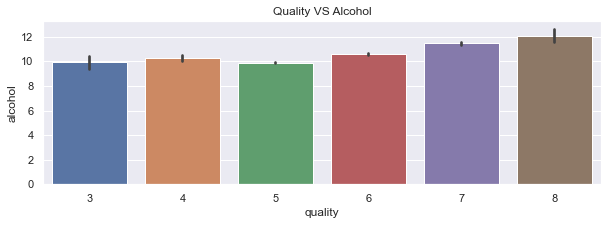

In [131]:
plt.figure(figsize=(10,3))
plt.title("Quality VS Alcohol")
sns.barplot(x='quality', y = 'alcohol', data=df)

In [140]:
bins = (2, 7, 8)
classes = ['notgood','Good']
df['quality']  = pd.cut(df['quality'], bins = bins, labels = classes)

In [142]:
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

1    1581
0      18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

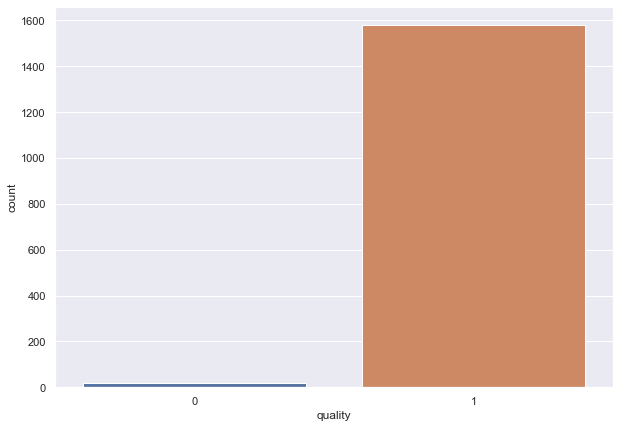

In [146]:
# Check Quality & Count
plt.figure(figsize= (10,7))
sns.countplot(df['quality'])

In [147]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [148]:
x = df.drop('quality', axis = 1)
y = df['quality']

In [149]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 21)

In [152]:
sc = StandardScaler()

In [153]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [155]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [156]:
pred1 = accuracy_score(y_test,pred_rf)
print(pred1*100)

99.0625


In [160]:
# Logistic Regression
lr = LogisticRegression().fit(x_train,y_train)
pred_lr = lr.predict(x_test)

In [162]:
pred = accuracy_score(y_test,pred_lr)
print(pred*100)

99.0625
